<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Survival Analysis in Python
Survival Analysis is a statistical method used to analyze the expected duration of time until an event occurs. It is commonly used in medical studies, customer churn prediction, risk modeling, and equipment failure analysis.

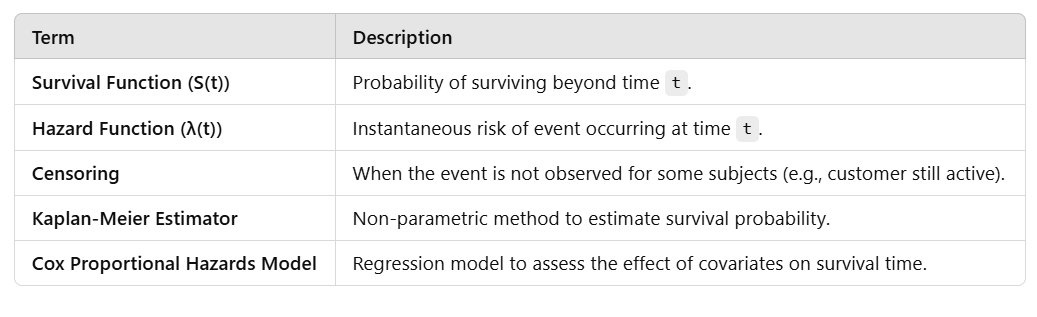

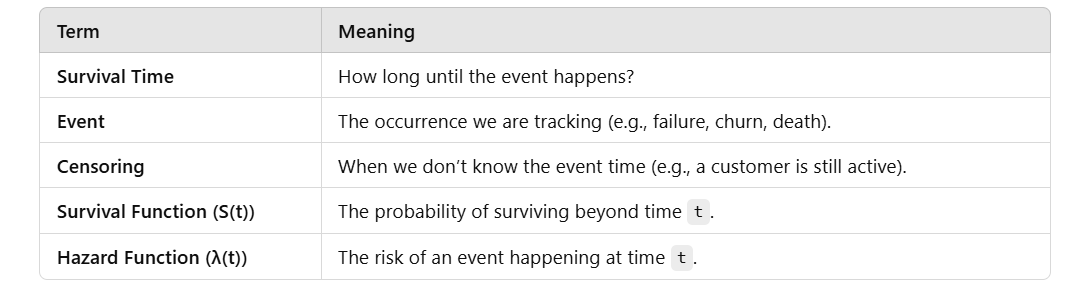

Survival analysis is a method used to analyze the time until an event happens. The event could be anything like:

A customer churning (stopping subscription)
A machine breaking down
A patient recovering or dying
A loan defaulting

In [1]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=74ad9b59adac77826203b4b4e35470c1bd4cd611c4bdba673b4c955cfc10b0c7
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter

In [3]:
# Simulated dataset
np.random.seed(42)
df = pd.DataFrame({
    "duration": np.random.randint(5, 50, size=100),  # Time until event/censoring
    "event": np.random.choice([1, 0], size=100, p=[0.7, 0.3]),  # 1 = event, 0 = censored
    "age": np.random.randint(25, 70, size=100),  # Age of subject
    "group": np.random.choice(["treatment", "control"], size=100)  # Group type
})

print(df.head())

   duration  event  age      group
0        43      0   31  treatment
1        33      0   65  treatment
2        19      1   57    control
3        47      0   64  treatment
4        12      1   63    control


In [9]:
df['group_code'] = df['group'].map({'treatment': 1, 'control': 0})
df.drop('group', axis=1, inplace=True)
df.rename(columns={'group_code': 'group'}, inplace=True)
print(df.head())

   duration  event  age  group
0        43      0   31      1
1        33      0   65      1
2        19      1   57      0
3        47      0   64      1
4        12      1   63      0


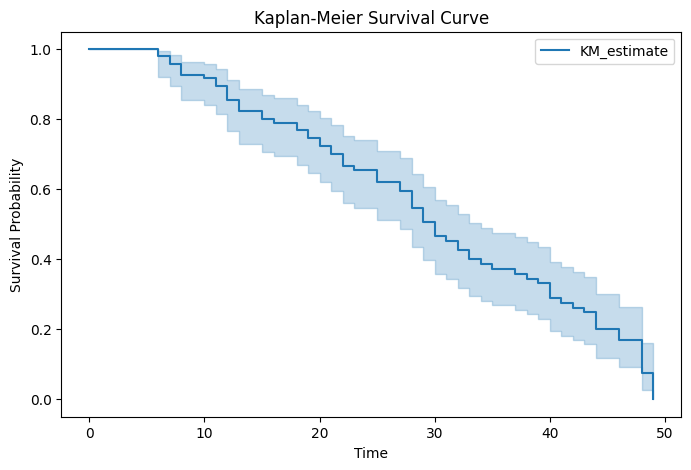

In [4]:
kmf = KaplanMeierFitter()
kmf.fit(df["duration"], event_observed=df["event"])

# Plot Survival Function
plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()


Interpretation:
The curve shows the probability of survival at different time points.
A steep drop means a high risk of failure at that time.


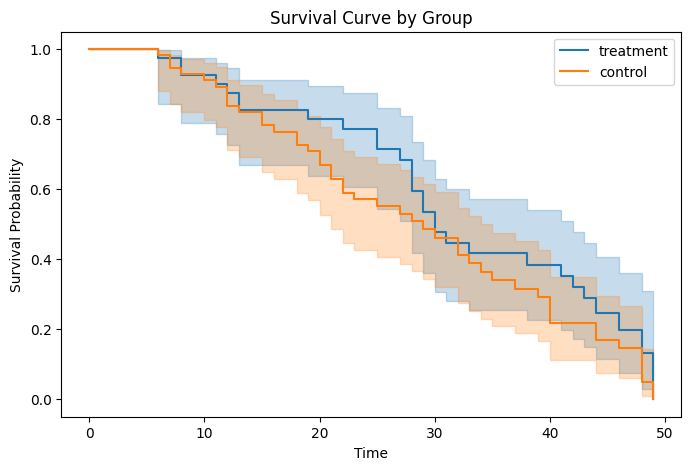

In [5]:
plt.figure(figsize=(8, 5))

for group in df["group"].unique():
    kmf.fit(df["duration"][df["group"] == group], event_observed=df["event"][df["group"] == group])
    kmf.plot_survival_function(label=group)

plt.title("Survival Curve by Group")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

Interpretation:
If the treatment group has a higher survival curve than the control group, the treatment is effective.
The difference can be statistically tested using the log-rank test.

The Cox model tells us which factors affect survival the most.

In [10]:
cph = CoxPHFitter()
cph.fit(df, duration_col="duration", event_col="event")

# Print coefficients (hazard ratios)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 100 total observations, 24 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 76
   partial log-likelihood = -271.96
         time fit was run = 2025-02-19 01:40:34 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.01      0.99      0.01           -0.03            0.01                0.98                1.01
group     -0.29      0.75      0.24           -0.76            0.17                0.47                1.19

           cmp to     z    p  -log2(p)
covariate                             
age          0.00 -0.72 0.47      1.09
group        0.00 -1.23 0.22      2.20
---
Concordance = 0.54
Partial AIC = 547.92
log-likelihood ratio test = 1.89 on 2 df
-log2(p) of ll-ratio test = 1.36

Key Results:

p-value: If < 0.05, the variable is statistically significant.
Hazard Ratio (HR):
HR > 1 → Increases the risk (shortens survival).
HR < 1 → Decreases the risk (extends survival).

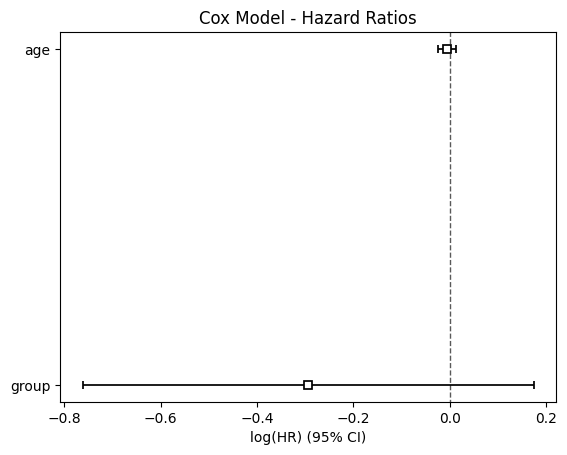

In [11]:
cph.plot()
plt.title("Cox Model - Hazard Ratios")
plt.show()


Interpretation:
Positive coefficients increase risk.
Negative coefficients are protective.

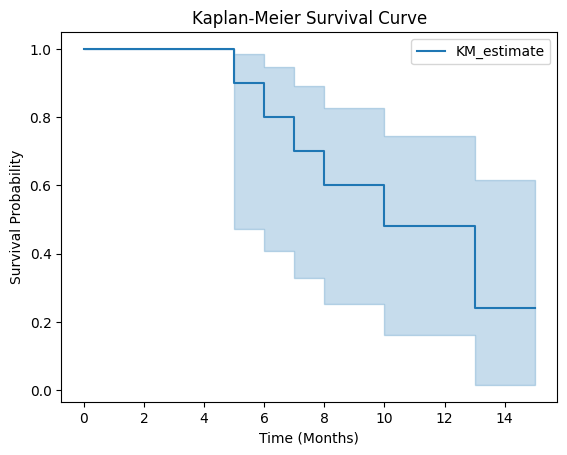

In [12]:
# Sample data
data = pd.DataFrame({
    "time_to_event": [5, 12, 8, 15, 10, 6, 9, 11, 13, 7],
    "event": [1, 0, 1, 0, 1, 1, 0, 0, 1, 1]  # 1 = Event happened, 0 = Censored
})

# Create Kaplan-Meier model
kmf = KaplanMeierFitter()
kmf.fit(data["time_to_event"], event_observed=data["event"])

# Plot the survival curve
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.show()

At the beginning, 100% are surviving.
As events (churn, failure, etc.) happen, survival probability decreases.
If an observation is censored, it means we don’t know their final outcome yet.

What This Graph Tells Us

The y-axis represents survival probability.
The x-axis represents time.
The curve drops as more events (e.g., churns) occur.

We can compare survival between different groups, like:

Customers on Basic Plan vs. Premium Plan
Treated vs. Untreated Patients
Machines with Preventive Maintenance vs. No Maintenance

In [14]:
df = pd.DataFrame({
    "time_to_event": [5, 12, 8, 15, 10, 6, 9, 11, 13, 7],
    "event": [1, 0, 1, 0, 1, 1, 0, 0, 1, 1],  # 1 = Event happened
    "age": [25, 45, 35, 50, 30, 40, 29, 48, 38, 33],  # Age of customer
    "support_calls": [3, 1, 5, 0, 2, 4, 1, 0, 6, 2],  # Number of complaints
    "plan": [1, 0, 1, 0, 1, 1, 0, 0, 1, 1]  # 1 = Premium, 0 = Basic
})

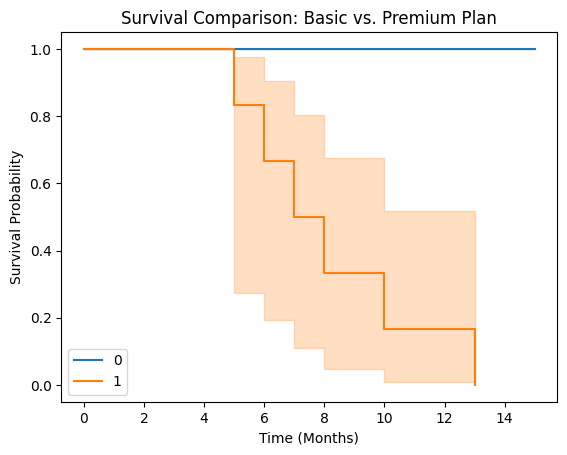

In [17]:
for group in [0, 1]:
    kmf.fit(data["time_to_event"][df["plan"] == group], event_observed=data["event"][df["plan"] == group])
    kmf.plot_survival_function(label=group)

plt.title("Survival Comparison: Basic vs. Premium Plan")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

If one group’s survival curve is higher, it means they survive longer.
If the curves are close together, the difference may not be significant.

/usr/local/lib/python3.11/dist-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column plan have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'plan'].var())
>>> print(df.loc[~events, 'plan'].var())

A very low variance means that the column plan completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning: Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.516. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?


<lifelines.CoxPHFitter: fitted with 10 total observations, 4 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 10
number of events observed = 6
   partial log-likelihood = -6.09
         time fit was run = 2025-02-19 01:52:36 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
age           -0.06      0.94      0.20           -0.45            0.32                0.64                1.38
support_calls -0.14      0.87      0.45           -1.03            0.75                0.36                2.13
plan          17.71  4.91e+07   2960.93        -5785.61         5821.03                0.00                 inf

               cmp to     z    p  -log2(p)
covariate                                 
age              0.00 -0.32 0.75      0.42
support_calls    0.00 -0.30 0.76      0.39
plan             0.00  0.01 1.00      0.01
---
Concordance = 0.86
Partial AIC = 18.19
log-likelihood ratio test = 9.47 on 3 df
-log2(p) of ll-ratio test = 5.40

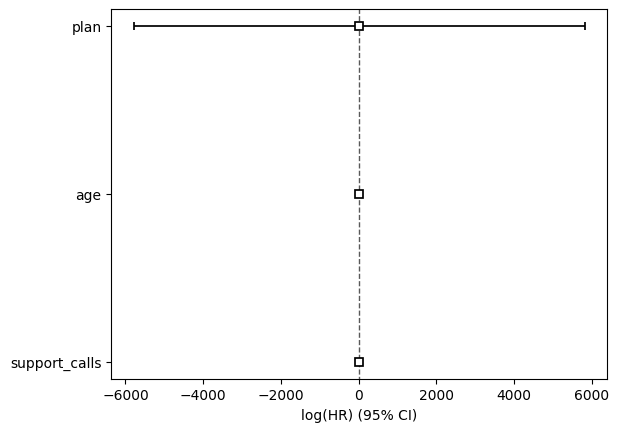

In [18]:
# Fit Cox model
cph = CoxPHFitter()
cph.fit(df, duration_col="time_to_event", event_col="event")

# Print model summary
cph.print_summary()

# Plot hazard ratios
cph.plot()
plt.show()

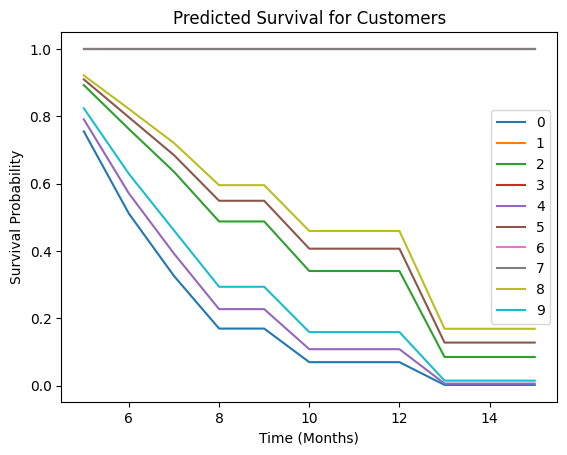

In [19]:
predicted_survival = cph.predict_survival_function(df)
predicted_survival.plot()
plt.title("Predicted Survival for Customers")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.show()

How to Read the Curve for Customer 0
Starts at 1.0 (100%) Survival Probability

This means that at time 0 (start), the customer is definitely active.
Survival Probability Drops Over Time

As time increases, the curve for customer 0 steps downward.
This means that the risk of churn increases with time.
Example Interpretation (Approximate Values from Graph)

At 6 months → Survival Probability ≈ 80%
→ The model predicts an 80% chance the customer is still active at 6 months.
At 10 months → Survival Probability ≈ 40%
→ There's only a 40% chance the customer remains active.
At 14 months → Survival Probability ≈ 10%
→ The customer has a high risk of churn by this time.
Comparing with Other Customers

If the curve for customer 0 drops faster than others, it means this customer has a higher churn risk.
If the curve stays high, they are more likely to stay active for a longer time.

Simple Summary
The steeper the drop, the higher the churn risk.
The flatter the curve, the longer the customer is expected to stay.
Customer 0's curve shows a significant drop → meaning they have a moderate-to-high chance of churning within the next few months.

Business Use Case
For a company, if customer 0 shows a high churn risk, they might: ✅ Offer discounts or promotions to retain them.
✅ Send targeted engagement emails.
✅ Assign a customer success manager to check in.